<a href="https://colab.research.google.com/github/reinhardbuyabo/ICS4102/blob/main/lassoregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# prompt: import from data.csv within sample_data

import pandas as pd

# Assuming the CSV file is in the sample_data directory within your Google Colab environment
try:
  df = pd.read_csv('/content/sample_data/data.csv')
  print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
  print("Error: 'data.csv' not found in /content/sample_data. Please ensure the file exists.")
except pd.errors.ParserError:
    print("Error: Could not parse data.csv. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


         X1        X2        X3        X4        X5        X6        X7  \
0 -0.105716 -1.056372  0.472175 -0.624175 -1.337268  0.109321  0.293656   
1  1.255322  0.125270  0.450023  2.003561  0.277094  0.450579  0.462558   
2  0.655216  0.825484 -0.890328  0.105923 -0.627933  1.788487 -0.338370   
3 -0.862742 -0.297754  0.316790 -2.747953 -0.468321  1.168713 -0.639897   
4 -0.492418  0.832162 -0.704394 -0.502445  0.734592 -0.435019 -0.017912   

         X8        X9       X10  ...      X192      X193      X194      X195  \
0  0.635470 -0.871020  0.194277  ...  0.101041  0.708435  1.343249 -1.202234   
1 -0.316563  0.052639  0.188200  ... -0.638715  0.407518  1.452270 -1.047522   
2 -0.601686 -0.837622 -0.085283  ...  0.108930  1.120339 -0.557336  0.542774   
3  0.602207 -0.390683 -0.279624  ...  1.174023 -0.597059 -0.768229 -1.508851   
4 -1.992973 -0.129440  1.429077  ...  1.123942  2.143922  2.052964  0.224794   

       X196      X197      X198      X199      X200           y  
0 

In [3]:
# prompt: Separate the features from the labels, and split the dataset into training and testing set

from sklearn.model_selection import train_test_split

try:
  # Assuming df is already defined from the previous code block
  # Separate features (X) and labels (y)
  X = df.drop('y', axis=1)  # Replace 'target_column' with your actual target column name
  y = df['y']

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

  print("X_train shape:", X_train.shape)
  print("X_test shape:", X_test.shape)
  print("y_train shape:", y_train.shape)
  print("y_test shape:", y_test.shape)

except NameError:
  print("Error: 'df' is not defined. Please ensure the DataFrame is loaded correctly.")
except KeyError:
    print("Error: 'target_column' not found in DataFrame. Please provide the correct target column name.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


X_train shape: (1200, 200)
X_test shape: (300, 200)
y_train shape: (1200,)
y_test shape: (300,)


In [4]:
# prompt: Use Lasso Regression to select the best features

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Assuming X_train and y_train are defined from the previous code block

# Create a Lasso regression model with alpha (regularization strength)
lasso = Lasso(alpha=0.1) # Adjust alpha as needed
# Fit the model to the training data
lasso.fit(X_train, y_train)

# Create a SelectFromModel object using the Lasso model
selector = SelectFromModel(lasso, prefit=True) # prefit=True because the model is already fit

# Transform the training and testing features to select only the important ones
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print("Selected features:", X_train.columns[selector.get_support()])
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

# Now you can use X_train_selected and X_test_selected for further model training/evaluation


Selected features: Index(['X6', 'X17', 'X28', 'X52', 'X91', 'X113', 'X144', 'X161', 'X166',
       'X181'],
      dtype='object')
X_train_selected shape: (1200, 10)
X_test_selected shape: (300, 10)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [5]:
# prompt: Use Ridge Regression to model the dataset.

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming X_train_selected, X_test_selected, y_train, and y_test are defined from the previous code block

# Create a Ridge regression model
ridge = Ridge(alpha=1.0) # You can adjust the alpha parameter

# Fit the model to the selected training data
ridge.fit(X_train_selected, y_train)

# Make predictions on the selected test data
y_pred = ridge.predict(X_test_selected)

# Evaluate the model (example: Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.037623422204496604


In [6]:
# prompt: Calculate the RMSE and R2 Score of the model.

from sklearn.metrics import r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Root Mean Squared Error: 0.19396758029242053
R-squared: 0.9999990089663308


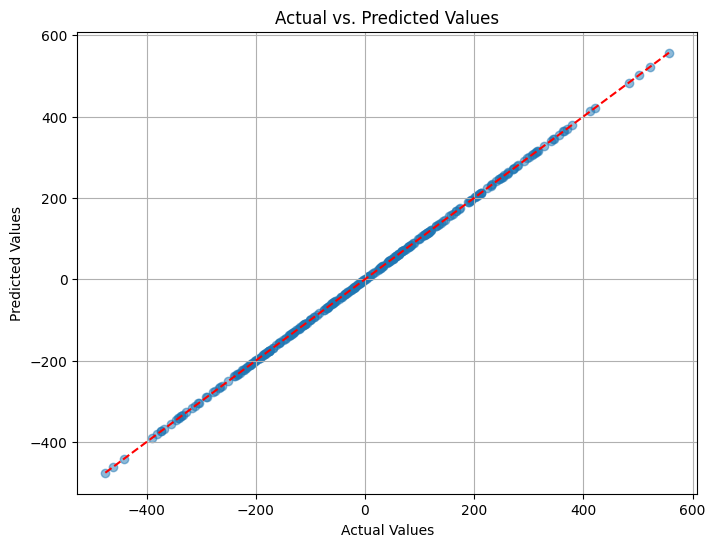

In [7]:
# prompt: Plot the line of best fit

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from the previous code block

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha controls point transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of best fit

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()
